# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Naomi Chin
- Leo Friedman
- Jake Heinlein
- Dante Tanjuatco
- Nathan Tripp

<a id='research_question'></a>
# Research Question

Is the combination of an mlb free agents age and batting performance, measured by relevant batting statistics (Batting Average, On Base Percentage, Slugging Average, etc.) indicative of their yearly salary, and if so, can we predict a player's salary based on these factors?

<a id='background'></a>

## Background & Prior Work

Many statistics attempt to quantify the offensive ability of Major League Baseball (MLB) players, however, the On-Base Percentage Plus Slugging (OPS) average is often regarded as the most telling **(1)**. OPS is adept at capturing a player’s overall offensive capabilities because it combines multiple relevant offensive statistics: On Base Percentage, the likelihood a player gets on base, and Slugging Percentage, a measurement of the quality of a player’s hits **(2)**. Thus it can be inferred that OPS and statistics similar to it (On-Base Percentage, Batting Average, Slugging Average, etc.) accurately reflect how valuable a player is to a baseball team. 

MLB Free Agents generally desire to sign highest paying contracts. At the same time, teams focus on signing the best players for the lowest cost possible. In many cases players who sign long-term, high paying contracts underperform relative to how much they're paid **(3)**. At the same time, countless players are undervalued and are paid much less than they deserve **(4)**. To avoid unfair compensensation, it is important that both players and teams understand the general fair contract value before entering in negotiations. Thus a model that can accurately predict a player's value from known factors would be  beneficial to the baseball industry. 

Similar studies to ours have been performed, however, they are not without issues. A project performed by Enes Arslan attempted to predict the salaries of baseball players through linear regression. While the general priciples of the project were sound, Arslan made the mistake of only looking at about 300 observations **(5)**. Such a small dataset is unlikely to provide insight that can be generalized to the whole league. Additional, Arslan didn't take into account the age of each player which is a factor that is likely very indicaive of salary **(5)**. Finally, Arsan only used data from 1986 to train the prediction model **(5)**. Data from 1986 is very outdated as inflation (among other factors) has greatly affected the salaries of current MLB players. 

**References:**
1. Pate, A. (24 Jan 2020) 3 Basic MLB Hitting Stats that Define a Great Hitter. The Hitting Vault. https://thehittingvault.com/3-basic-mlb-hitting-stats-that-define-a-great-hitter/
2. Fields, B. (28 Aug 2022) How to Calculate OPS in Baseball. SportsRec. https://www.sportsrec.com/calculate-ops-baseball-2063754.html
3. Paulson, R. (12 Dec 2020) New Evidence in the Study of Shirking in Major League Baseball. Human Kinetics Journal. https://www.researchgate.net/publication/347239317_New_Evidence_in_the_Study_of_Shirking_in_Major_League_Baseball
4. Anderson, R.J. (14 Jan 2022) MLB's 10 most underpaid players, including reigning MVP Shohei Ohtani and Cy Young winner Corbin Burnes.
https://www.cbssports.com/mlb/news/mlbs-10-most-underpaid-players-including-reigning-mvp-shohei-ohtani-and-cy-young-winner-corbin-burnes/
5. Arslan, Enes (Summer 2022) Salary Prediction of Baseball https://www.kaggle.com/code/enesarslan8/salary-prediction-of-baseball-players

# Hypothesis


MLB free agents' age is non-linearly correlated with salary such that salary will increase as players approach their "prime" and then decrease each year following. Batting performance is positively correlated with salary; players who bat better get paid more. 

Given relevant information of an MLB Free Agent (age, batting average, on base percentage, etc.), our predictive model will be able to accurately predict the salary of said baseball player. 

Also, the year a baseball contract is given will likely influence the salary due to general inflation over time. We will control this confounder by adjusting salaries to match inflationary trends. 

# Dataset(s)

**Dataset 1:**

- Dataset name: MLB Free Agent Contracts 1991-2023
- Link: https://docs.google.com/spreadsheets/d/1bXUPBabVf82y0m2KaZ0F9Fno9xwZ2pmepbFvMBX_TEM/edit#gid=1265430999
- Number of observations: 4995
- Description: Dataset of all MLB Free Agent Contracts given from 1991-2023. Each observation contains relevant variables such salary, year signed, player name, and player age.

**Dataset 2:**

- Dataset name: MLB Batting Stats 1871-2022
- Link to dataset: https://github.com/chadwickbureau/baseballdatabank/blob/master/core/Batting.csv
- Number of observations: 110458
- Description: Dataset of all MLB player batting statistics from from 1871-2022. Each observation contains variables (hits, walks, doubles, singles, homeruns, etc.) that can be used to calculate batting average and on base percentace plus slugging average.

**Dataset 3:**

- Dataset name: MLB Batting Player Information 1871-2022
- Link to the dataset: https://github.com/chadwickbureau/baseballdatabank/blob/master/core/People.csv
- Number of observations: 20369
- Description: Dataset of general information about MLB players from 1871-2022. Each observation contains variables relating to the player such as age, name, and birthday.

**Combining datasets:**
We plan to combine dataset 2 and 3 by adding the player names in dataset 3 to a column in dataset 2. This is possible because dataset 2 and 3 each share the variable playerIDs. We plan on comparing values in dataset 1 with values in dataset 2 based on player names. We will achieve this by standardizing each player's name.

# Setup

In [2]:
# import packages and setup visuals
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import statistics
pd.options.mode.chained_assignment = None 

# Data Cleaning

### Contracts

Concatenate all Contract dataset csv files from years 1991-2022 as a dataframe named "contracts". 

In [3]:
# get list of all contract dataset filepaths
directory = 'data/contracts/'
filepaths = [directory + filename for filename in os.listdir(directory)]

# merge all contract files in "contracts" directory as one dataframe
contracts = pd.concat([pd.read_csv(filepath) for filepath in filepaths])
print('contracts shape: ', contracts.shape)
display(contracts.head())

contracts shape:  (4996, 18)


,Player,Pos'n,Age,Qual Offer,Old Club,New Club,Years,Guarantee,Term,Option,Opt Out,AAV,Player Agent,Club Owner,Baseball Ops head / club GM,Details,Age 7/1/21,Age 7/1/22
0,"Cano, Robinson",2b,31.0,rejected,NYA,SEA,10.0,"$240,000,000",2014-23,NaN,NaN,"$24,000,000",Roc Nation,Nintendo/America,Jack Zduriencik,NaN,NaN,NaN
1,"Ellsbury, Jacoby",of,30.0,rejected,BOS,NYA,7.0,"$153,000,000",2014-20,club,NaN,"$21,857,143",Boras Corp.,Hal Steinbrenner,Brian Cashman,NaN,NaN,NaN
2,"Choo, Shin-Soo",rf,31.0,rejected,CIN,TEX,7.0,"$130,000,000",2014-20,NaN,NaN,"$18,571,429",Boras Corp.,RDavis/BSimpson,Jon Daniels,NaN,NaN,NaN
3,"McCann, Brian",c,30.0,rejected,ATL,NYA,5.0,"$85,000,000",2014-18,club,NaN,"$17,000,000",BB Abbott,Hal Steinbrenner,Brian Cashman,NaN,NaN,NaN
4,"Granderson, Curtis",of,33.0,rejected,NYA,NYN,4.0,"$60,000,000",2014-17,NaN,NaN,"$15,000,000",Matt Brown,Fred Wilpon,Sandy Alderson,NaN,NaN,NaN


Combine the three columns, 'Age', 'Age 7/1/21', and 'Age 7/1/22', into one 'Age' column by taking the non-null value from each set of columns (if it exists).

In [4]:
# set 'Age' column to value in 'Age  7/1/21' column or 'Age 7/1/22' column if NaN
contracts['Age'] = contracts['Age'].add(contracts['Age 7/1/21'], fill_value=0)
contracts['Age'] = contracts['Age'].add(contracts['Age 7/1/22'], fill_value=0)

There are 18 columns per contract observation, we are only looking at 5. Drop all columns that are irrelevant to our project.

In [5]:
contracts = contracts[['Player','Pos\'n', 'Age', 'Term', 'AAV']]

Now that the dataframe only contains relevant variables, drop all observations with NaN values. 

In [6]:
contracts = contracts.dropna(axis=0)

Our project is looking at how batting performance affects salary. Pitcher's are not paid based on their batting performance. Drop all pitchers.

In [7]:
# drop players that are pitchers
contracts = contracts[contracts["Pos'n"].str.contains("hp") == False]

# drop position column (no longer needed)
contracts = contracts.drop('Pos\'n',axis=1)

Next, standardize our variables so we can plot and compare them with values from other datasets. 

In [8]:
# convert a players yearly salary (AAV) from a string to an int
def salary_to_int(str_in):
    return int(str_in.replace('$','').replace(',',''))

# convert the term of a player's contract (Term) to the year they were offered it
def term_to_year(str_in):
    return int(str(str_in).split('-')[0])

# standardize player names
def standardize_name(str_in):
    if ',' in str_in:
        name_list = str(str_in).split(',')
        str_in = name_list[1].strip() + " " + name_list[0].strip()
    str_in = str_in.replace('Jr.','')
    str_in = str_in.replace('Sr.','')
    str_in = str_in.replace('.','')
    str_in = str_in.replace('é','e')
    str_in = str_in.replace('á','a')
    return str_in.replace(' ', '')

# round all ages
def standardize_age(age):
    return round(float(age), 0)

In [9]:
# standardize name, age, salary, and term variables
contracts['Player'] = contracts['Player'].apply(standardize_name)
contracts['Age'] = contracts['Age'].apply(standardize_age)
contracts['AAV'] = contracts['AAV'].apply(salary_to_int)
contracts['Term'] = contracts['Term'].apply(term_to_year)

Rename contract columns for consistency.

In [10]:
contracts.columns = ['playerName','playerAge','year','yearSalary']

Some observations have a yearSalary value of 1. This is a mistake by the dataset creators. Drop all observations with yearSalary value of 1.

In [11]:
contracts = contracts[contracts['yearSalary'] > 1]

The "contracts" dataframe is cleaned!

In [12]:
display(contracts.head())

,playerName,playerAge,year,yearSalary
0,RobinsonCano,31.0,2014,24000000
1,JacobyEllsbury,30.0,2014,21857143
2,Shin-SooChoo,31.0,2014,18571429
3,BrianMcCann,30.0,2014,17000000
4,CurtisGranderson,33.0,2014,15000000


### Batting

Read Batting.csv dataset file as a dataframe named "batting".

In [13]:
# read Batting file as dataframe
batting = pd.read_csv('data/batting/Batting.csv')

print('batting shape: ', batting.shape)
display(batting.head())

batting shape:  (110495, 22)


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


There are 22 columns per batting observation, we are only looking at 10. Drop all columns that are irrelevant to our project.

In [14]:
batting = batting[['playerID', 'yearID', 'AB', 'H', '2B', '3B', 'HR', 'BB','HBP','SF']]

Some players have two sets of batting stats from the same year. This is because they were on two different teams during one year. For example, player with playerID value of 'abramca01' has two obsevations in the year 1952.

In [15]:
display(batting.groupby(['playerID','yearID']).get_group(('abramca01', 1952)))

,playerID,yearID,AB,H,2B,3B,HR,BB,HBP,SF
35670,abramca01,1952,10,2,0,0,0,2,0.0,NaN
35671,abramca01,1952,158,44,9,2,2,19,0.0,NaN


Combine these multiple year stats such that every player only has one observation of stats per year. This may take around a minute to run.

In [16]:
# summing batting stats from the same player in the same year
batting = batting.groupby(['playerID', 'yearID']).agg(lambda x: x.sum(min_count=1)).reset_index()

# display 'abraca01' in 1952 to show success
display(batting.groupby(['playerID','yearID']).get_group(('abramca01', 1952)))

,playerID,yearID,AB,H,2B,3B,HR,BB,HBP,SF
190,abramca01,1952,168,46,9,2,2,21,0.0,NaN


Now that the dataframe only contains relevant variables, drop all observations with NaN values. 

In [17]:
batting = batting.dropna(axis=0)

A player can only be judged by their batting ability if they went up to bat at least once. Drop observations with zero at bats. 

In [18]:
batting = batting[batting['AB'] > 0].reset_index()

This batting dataframe only contains the raw batting numbers per player in a given season (number of hits, strikes, homeruns, etc.). For our analysis, we want averaged data. Add columns for "Batting Average" (AVG), "On Base Percentage" (OBP), "Slugging Average" (SLG), and "On Base Plus Slugging Average" (OBS).

In [19]:
# calculate batting average
def calc_avg(h, ab):
    return h / ab
  
# calculate on base percentage
def calc_obp(h, bb, hbp, ab, sf):
    return (h + bb + hbp) / (ab + bb + sf + hbp)
    
# calculate total bases
def calc_tb(h, two_b, three_b, hr):
    singles = h - two_b - three_b - hr
    return singles + two_b * 2 + three_b * 3 + hr * 4

# calculate slugging average
def calc_slg(tb, ab):
    return tb / ab

# calculate on base plus slugging average
def calc_obs(obp, slg):
    return obp + slg

In [20]:
# create Batting Average column in batting dataframe
avg = calc_avg(h=batting['H'], ab=batting['AB'])
batting['AVG'] = round(avg, 3)

# create On Base Percentage average column in batting dataframe
obp = calc_obp(h=batting['H'], bb=batting['BB'], hbp=batting['HBP'], ab=batting['AB'], sf=batting['SF'])
batting['OBP'] = round(obp, 3)

# create Slugging average column in batting dataframe
tb = calc_tb(h=batting['H'], two_b=batting['2B'], three_b=batting['3B'], hr=batting['HR'])
slg = calc_slg(tb, batting['AB'])
batting['SLG'] = round(slg, 3)

# create On Base Plus Slugging column in batting dataframe
obs = calc_obs(obp, slg)
batting['OBS'] = round(obs, 3)

Now that our dataframe has these averages, drop all unecessary columns of raw statistics.

In [21]:
batting = batting[['playerID', 'yearID','AB', 'AVG', 'OBP','SLG','OBS']]

Rename columns for consistency. 

In [22]:
batting.columns = ['playerID', 'year', 'AB', 'AVG', 'OBP', 'SLG','OBS']

The "batting" dataframe is cleaned!

In [23]:
display(batting.head())

,playerID,year,AB,AVG,OBP,SLG,OBS
0,aardsda01,2006,2,0.000,0.000,0.000,0.000
1,aardsda01,2008,1,0.000,0.000,0.000,0.000
2,aardsda01,2015,1,0.000,0.000,0.000,0.000
3,aaronha01,1954,468,0.280,0.322,0.447,0.769
4,aaronha01,1955,602,0.314,0.366,0.540,0.906


### Merging Batting and People

Eventually, we will be comparing data in the "contracts" dataframe to data in the "batting" dataframe. To do this, each observation in the dataframes needs to have some variable that is shared across both dataframes. In this case, use player names as the shared variable for lookups. Information in the People database can make this possible

Read People.csv file as a dataframe named "people".

In [24]:
people = pd.read_csv('data/batting/People.csv')

print('people shape: ', people.shape)
display(people.head())

people shape:  (20370, 24)


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


Add a "playerName" column to the "people" dataframe of the first and last name for each player.

In [25]:
people['playerName'] = people['nameFirst'] + ' ' + people['nameLast']

We only need playerID and name for the merge. Drop all other columns.

In [26]:
people = people[['playerID','playerName']]

Merge "batting" dataframe and "people" dataframe to add a "name" column to the "batting" dataframe.

In [27]:
batting = batting.merge(people, how='left', on='playerID')

Reorder columns in the "batting" dataframe for consistency. 

In [28]:
batting = batting[['playerID','playerName','year','AB', 'AVG', 'OBP', 'SLG','OBS']]

Standardize names in the "playerName" column.

In [29]:
batting['playerName'] = batting['playerName'].apply(standardize_name)

The "batting" dataframe and "people" dataframe are merged!

In [30]:
display(batting.head())

,playerID,playerName,year,AB,AVG,OBP,SLG,OBS
0,aardsda01,DavidAardsma,2006,2,0.000,0.000,0.000,0.000
1,aardsda01,DavidAardsma,2008,1,0.000,0.000,0.000,0.000
2,aardsda01,DavidAardsma,2015,1,0.000,0.000,0.000,0.000
3,aaronha01,HankAaron,1954,468,0.280,0.322,0.447,0.769
4,aaronha01,HankAaron,1955,602,0.314,0.366,0.540,0.906


### Final cleaning steps

Our "contract" dataframe currently only contains contracts of **free agent batters** from the years 1991-2022. Our "batting" dataframe contains data on all players from 1871-2022. Drop all players from "batting" dataframe who do not appear in the "contracts" dataframe. 

In [31]:
batting = batting[batting['playerName'].isin(list(contracts['playerName'].unique()))]

The two original datasets occasionally used different naming conventions that could not be rectified through standardization. Because of this, "batting" ends up missing 22 names from "contracts".

In [32]:
missing_from_batting  = len(contracts['playerName'].unique()) - len(batting['playerName'].unique())
print('number of missing names from batting: ', missing_from_batting)

number of missing names from batting:  22


Address the above issue by droping all players from "contracts" dataframe who do not appear in the "batting" dataframe. 

In [33]:
contracts = contracts[contracts['playerName'].isin(list(batting['playerName'].unique()))]
print("unique batting names: ", len(list(batting['playerName'].unique())))
print("unique contract names: ", len(list(contracts['playerName'].unique())))

unique batting names:  769
unique contract names:  769


One final problem with our data is that some unique players in the dataframes happen to have the same first and last name. These players should not be treated as the same player. Remove a player if there exists another player with the same name.

In [34]:
# all names associated with a unique playerID
names = pd.Series([group[1]['playerName'].reset_index(drop=True)[0] for group in batting.groupby('playerID')])
name_counts = names.value_counts();

# list of players with the same name 
repeated_names = list(name_counts[name_counts > 1].index)

# remove batters and contracts with repeated names name
batting = batting[~batting['playerName'].isin(repeated_names)]
contracts = contracts[~contracts['playerName'].isin(repeated_names)]

The data cleaning is done!

In [35]:
print("unique batting names: ", len(list(batting['playerName'].unique())))
print("unique contract names: ", len(list(contracts['playerName'].unique())))
print("batting shape: ", batting.shape) 
print("contracts shape: ", contracts.shape)

unique batting names:  731
unique contract names:  731
batting shape:  (9423, 8)
contracts shape:  (1396, 4)


# Data Analysis & Results

The first variable for predicting salaries that we will look at is the year of the contracts. Factors including inflation and viewership are expected to alter MLB salaries from year to year. First, we will compare the MLB free agent contracts between 1991 and 2022.

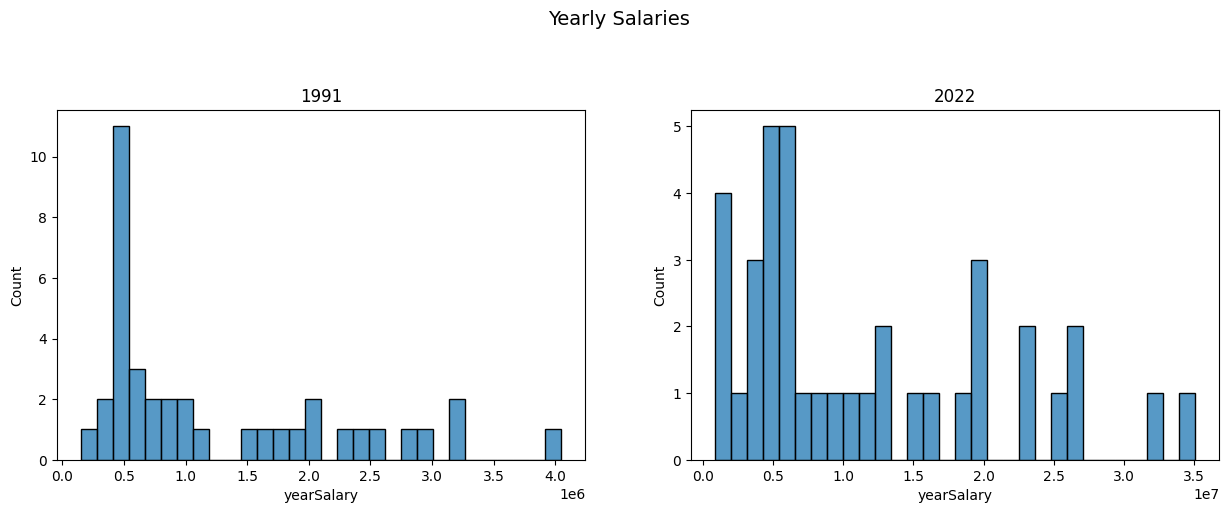

In [36]:
# compare yearly salaries between 1991 and 2022
fig = plt.figure(figsize=(15, 10))
plt.suptitle("Yearly Salaries", fontsize=14)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.title.set_text('1991')
ax2.title.set_text('2022')
sns.histplot(data = contracts[contracts['year'] == 1991], x = 'yearSalary', bins = 30, ax = ax1)
sns.histplot(data = contracts[contracts['year'] == 2022], x = 'yearSalary', bins = 30, ax = ax2)
plt.show()

As expected, the average yearly salary jumped a significant amount from 1991 to 2022. The highest contract from 1991 is around \\$4,000,000 compared to the highest contract from 2022 being close to \\$35,000,000. 

We will now look at the average salary from each year of data that we have obtained (1991-2022).

Text(0.5, 0.98, 'Average Salary vs. Year')

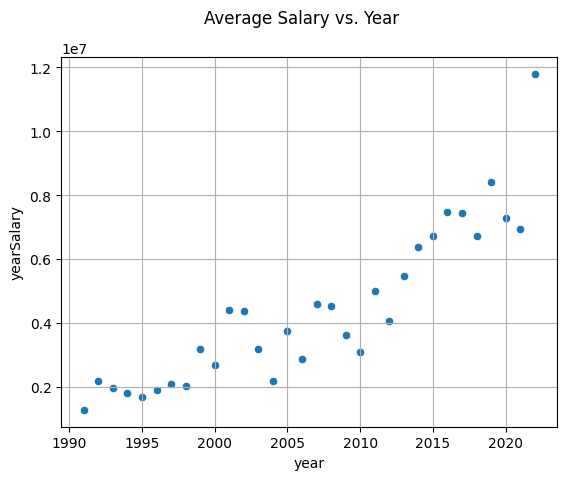

In [37]:
fig, ax = plt.subplots()
s_years = contracts.groupby('year').yearSalary.agg('mean')
sns.scatterplot(data=s_years, ax=ax)
plt.grid()
fig.suptitle('Average Salary vs. Year')

The average salary has a general upward trend as the year increases. From these results, it is important to take into account the year when predicting salaries. 

In order to predict what information and stats are important for predicting salaries, we will take a look at the stats of the highest paid player from each year. Since we want to use previous performace to predict future salaries, we will first look at only the year prior to each contract. It will be helpful to get a better idea of what stats to expect given high salaries.

In [38]:
# look at the previous year stats for the highest contract from each year
salary_years = contracts['year'].value_counts().rename_axis('year').reset_index(name='counts')
salary_years['avg salary'] = ''
for i in range(len(salary_years)):
    salary_years['avg salary'][i] = statistics.mean(contracts[contracts['year'] == salary_years['year'][i]]['yearSalary'])
    salary_years = salary_years.sort_values(by=['year']).reset_index(drop = True)

# find the maximum salary from each year
salary_years['max salary'] = ''
for i in range(len(salary_years)):
    salary_years['max salary'][i] = ((contracts[contracts['year'] == salary_years['year'][i]]['yearSalary'])  
    [(contracts[contracts['year'] == salary_years['year'][i]]['yearSalary']).idxmax()])


# find players with max salary
max_player = (contracts[contracts['year']==1991][contracts[contracts['year']==1991]['yearSalary'] ==
 int(salary_years[salary_years['year']==1991]['max salary'])])

for i in range(len(salary_years)-1):
    max_player=max_player.append(contracts[contracts['year']==salary_years['year'][i+1]][contracts[contracts['year']==
    salary_years['year'][i+1]]['yearSalary'] == int(salary_years[salary_years['year']==salary_years['year'][i+1]]['max salary'])])
max_player = max_player.reset_index(drop = True)

# find the previous year stats for each max salary player
max_player['previous AVG'] = ''
max_player['previous AVG'][0] = np.nan
max_player['previous OBP'] = ''
max_player['previous OBP'][0] = np.nan
max_player['previous SLG'] = ''
max_player['previous SLG'][0] = np.nan
max_player['previous OBS'] = ''
max_player['previous OBS'][0] = np.nan
for i in range(len(max_player)-1):
    max_player['previous AVG'][i+1] = (float(batting[batting['year'] == max_player['year'][i]]
    [batting[batting['year'] == max_player['year'][i]]['playerName'] == max_player['playerName'][i]]['AVG']))
for i in range(len(max_player)-1):
    max_player['previous OBP'][i+1] = (float(batting[batting['year'] == max_player['year'][i]]
    [batting[batting['year'] == max_player['year'][i]]['playerName'] == max_player['playerName'][i]]['OBP']))
for i in range(len(max_player)-1):
    max_player['previous SLG'][i+1] = (float(batting[batting['year'] == max_player['year'][i]]
    [batting[batting['year'] == max_player['year'][i]]['playerName'] == max_player['playerName'][i]]['SLG']))
for i in range(len(max_player)-1):
    max_player['previous OBS'][i+1] = (float(batting[batting['year'] == max_player['year'][i]]
    [batting[batting['year'] == max_player['year'][i]]['playerName'] == max_player['playerName'][i]]['OBS']))


# find the minimum salary from each year
salary_years['min salary'] = ''
for i in range(len(salary_years)):
    salary_years['min salary'][i] = ((contracts[contracts['year'] == salary_years['year'][i]]['yearSalary'])  
    [(contracts[contracts['year'] == salary_years['year'][i]]['yearSalary']).idxmin()])

/var/folders/65/1z_gfl2j17vdrnhlyjg59lfh0000gn/T/ipykernel_29285/670387867.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_player=max_player.append(contracts[contracts['year']==salary_years['year'][i+1]][contracts[contracts['year']==
/var/folders/65/1z_gfl2j17vdrnhlyjg59lfh0000gn/T/ipykernel_29285/670387867.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_player=max_player.append(contracts[contracts['year']==salary_years['year'][i+1]][contracts[contracts['year']==
/var/folders/65/1z_gfl2j17vdrnhlyjg59lfh0000gn/T/ipykernel_29285/670387867.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_player=max_player.append(contracts[contracts['year']==salary_years['year'][i+1]][contracts[contracts['year']==
/var

Looking at the average salary, maximum salary, and minimum salary from the first three and last three years of data:



In [39]:
print(salary_years.iloc[np.r_[:3, -3:0]])

    year  counts       avg salary max salary min salary
0   1991      38                     4050000     150000
1   1992      30   2171166.666667   12000000     375000
2   1993      50       1977113.32    7291667     109000
29  2020      44   7292992.431818   35000000    1000000
30  2021      37   6938513.513514   25000000    1000000
31  2022      38  11792543.842105   35100000     850000


The highest salary player from each year along with their previous year stats (AVG, OBP, SLG, OBS):

In [40]:
print(max_player)

          playerName  playerAge  year  yearSalary previous AVG previous OBP  \
0   DarrylStrawberry       29.0  1991     4050000          NaN          NaN   
1     MikePagliarulo       32.0  1992    12000000        0.265        0.361   
2         BarryBonds       28.0  1993     7291667          0.2        0.213   
3     RafaelPalmeiro       29.0  1994     6070000        0.336        0.458   
4        LarryWalker       28.0  1995     5623595        0.319        0.392   
5      RobertoAlomar       28.0  1996     6000000        0.306        0.381   
6        AlbertBelle       30.0  1997    11000000        0.328        0.411   
7    AndresGalarraga       37.0  1998     8250000        0.274        0.332   
8           MoVaughn       31.0  1999    13333333        0.305        0.397   
9         GregVaughn       34.0  2000     8500000        0.281        0.358   
10     AlexRodriguez       25.0  2001    25200000        0.254        0.365   
11        BarryBonds       37.0  2002    18000000   

Our next step in data analysis is to see whether the factors we're looking at (Age, AVG, OBP, etc.) are actually correlated with player salary. This involves looking up player statistics in the "batting" dataframe. To make this process easier we will make a DataFrameGroupBy named "batting_grouped" so that we can look up specific player stats during specific years.

In [41]:
batting_grouped = batting.groupby(['playerName','year'])

To plot factors against salary we need some functions that can return plottable data. The two functions below are used to return a list of tuples in the form (stat, salary). These tuples can be plotted later to look for relationships.

In [42]:
# get a player's statistics
# player (str): the name of the player
# year (float): the year of the statistics 
# return: a one row dataframe of the batting statistics 
def getBattingStats(player: str, year: float):
    try:
        return batting_grouped.get_group((player, year))
    except: 
        return None

# gets data for plotting a batting stat against a yearly salary.  
# stat (str) : the stat to plot against salary
# AB_limit (int) : drops any stat with less at bats than this
# years_back (int) : how many previous years of statistics to average.
# return: a list of tuples (stat, salary)
def getPlotableData(stat: str, AB_limit: int, years_back: int):
    data = []
    for index, contract in contracts.iterrows():
        if contract['playerName'] in list(batting['playerName']):
            year_salary = contract['yearSalary']
            average = 0
            for i in range(years_back):
                stats = getBattingStats(contract['playerName'], contract['year']-(i+1))
                if stats is not None and float(stats['AB']) > AB_limit:
                    average += float(stats[stat])
                else: 
                    average = -1
                    break
            if average != -1:
                data.append((float(average/years_back), year_salary))
    return data

First we will compare the age of players to their salaries. We expect as players get older, teams will not want to invest as much money in them.

<AxesSubplot: xlabel='Age', ylabel='year salary'>

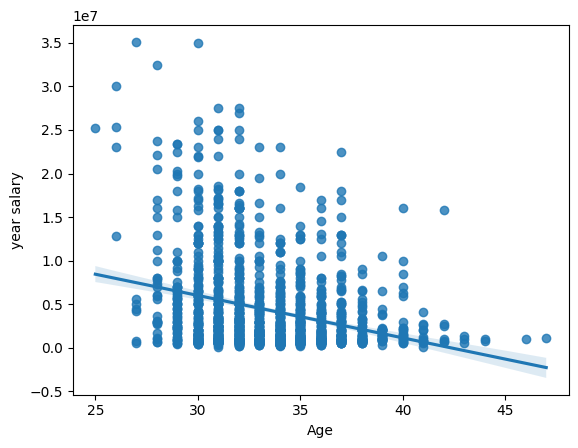

In [43]:
# Players yearly salary compared to their age
data = []
for index, contract in contracts.iterrows():
    if contract['playerName'] in list(batting['playerName']):
        year_salary = contract['yearSalary']
        stat = contract['playerAge']
        data.append((stat, year_salary))
fig, ax = plt.subplots()
sns.regplot(data=pd.DataFrame(data=data, columns = ['Age', 'year salary']), x='Age', y='year salary')

From the figure, we can see there is a general downward trend as age increases. The highest salaries at 30 years of age or before.

Here we create three scatterplots that describe the Batting Average of players (going back up to 3 years) against the salaries. These plots ignore data that have under 50 At Bats.

<AxesSubplot: xlabel='AVG_3', ylabel='year salary'>

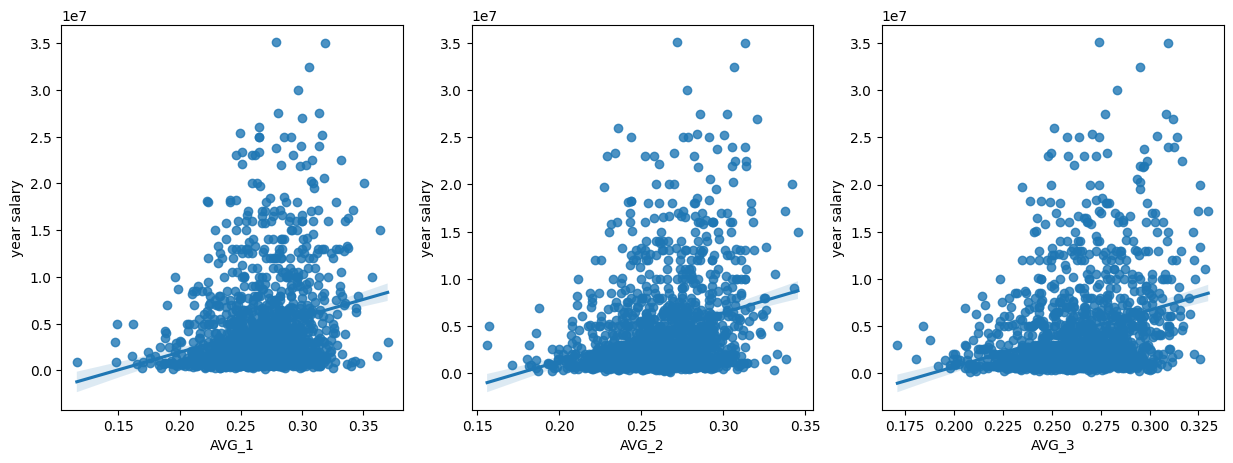

In [56]:
data_1 = pd.DataFrame(data= getPlotableData('AVG', 50, 1), columns = ['AVG_1', 'year salary']) 
data_2 = pd.DataFrame(data= getPlotableData('AVG', 50, 2), columns = ['AVG_2', 'year salary']) 
data_3 = pd.DataFrame(data= getPlotableData('AVG', 50, 3), columns = ['AVG_3', 'year salary']) 
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.regplot(data=data_1, x='AVG_1', y='year salary', ax=ax1)
sns.regplot(data=data_2, x='AVG_2', y='year salary', ax=ax2)
sns.regplot(data=data_3, x='AVG_3', y='year salary', ax=ax3)

From left to right, the salaries are compared to prior batting averages from one, two, and three years prior. In all three instances, there appears to be a general upward trend of salaries as the average increases.  

Create three scatterplots of plotting on base percentage against yearly salary. The scatter plots ignore statistics with at bats under 50 and look 1, 2, and 3 years back respectively. 

<AxesSubplot: xlabel='OBP_3', ylabel='year salary'>

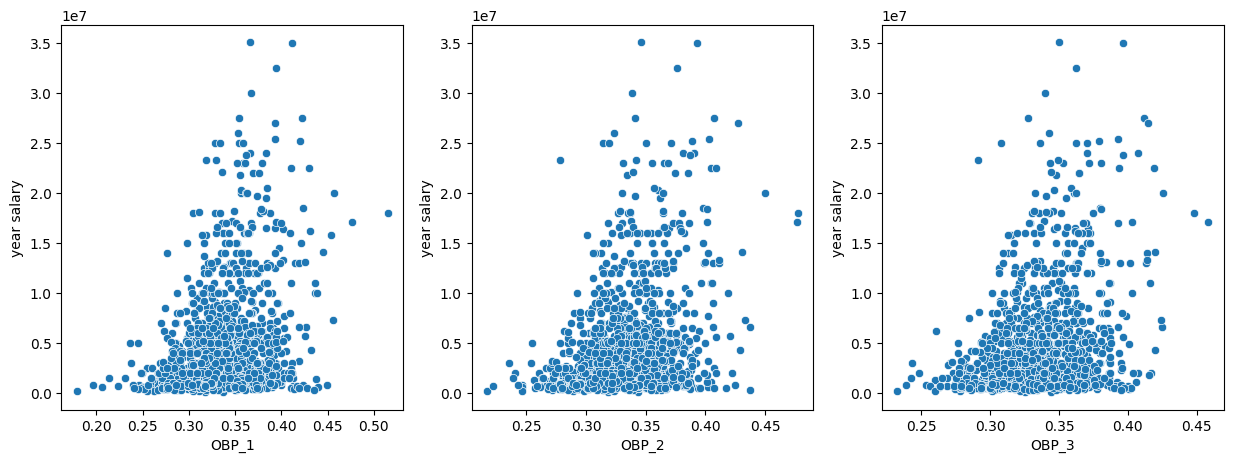

In [45]:
data_1 = pd.DataFrame(data= getPlotableData('OBP', 50, 1), columns = ['OBP_1', 'year salary']) 
data_2 = pd.DataFrame(data= getPlotableData('OBP', 50, 2), columns = ['OBP_2', 'year salary']) 
data_3 = pd.DataFrame(data= getPlotableData('OBP', 50, 3), columns = ['OBP_3', 'year salary']) 
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.scatterplot(data=data_1, x='OBP_1', y='year salary', ax=ax1)
sns.scatterplot(data=data_2, x='OBP_2', y='year salary', ax=ax2)
sns.scatterplot(data=data_3, x='OBP_3', y='year salary', ax=ax3)

There appears to be a positive relationship between OBP and salary for all three previous years.

Create three scatterplots that plot Slugging Percentage against yearly salary. The scatter plots ignore statistics with at bats under 50 and look 1, 2, and 3 years back respectively.

<AxesSubplot: xlabel='SLG_3', ylabel='year salary'>

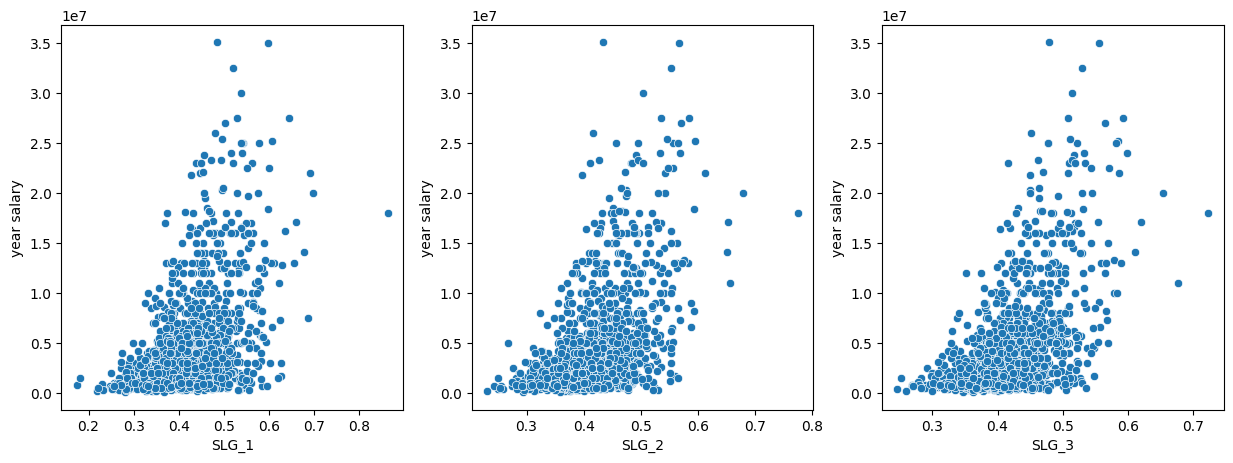

In [46]:
data_1 = pd.DataFrame(data= getPlotableData('SLG', 50, 1), columns = ['SLG_1', 'year salary']) 
data_2 = pd.DataFrame(data= getPlotableData('SLG', 50, 2), columns = ['SLG_2', 'year salary']) 
data_3 = pd.DataFrame(data= getPlotableData('SLG', 50, 3), columns = ['SLG_3', 'year salary']) 
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.scatterplot(data=data_1, x='SLG_1', y='year salary', ax=ax1)
sns.scatterplot(data=data_2, x='SLG_2', y='year salary', ax=ax2)
sns.scatterplot(data=data_3, x='SLG_3', y='year salary', ax=ax3)

Similarly to batting averages and on-base percentage (OBP), there is a general upward trend of salaries compared to slugging for all three years prior. 

Create three scatterplots that plot On-Base Plus Slugging against Yearly Salary. The scatter plots ignore statistics with at bats under 50 and look 1, 2, and 3 years back respectively.

<AxesSubplot: xlabel='OBS_3', ylabel='year salary'>

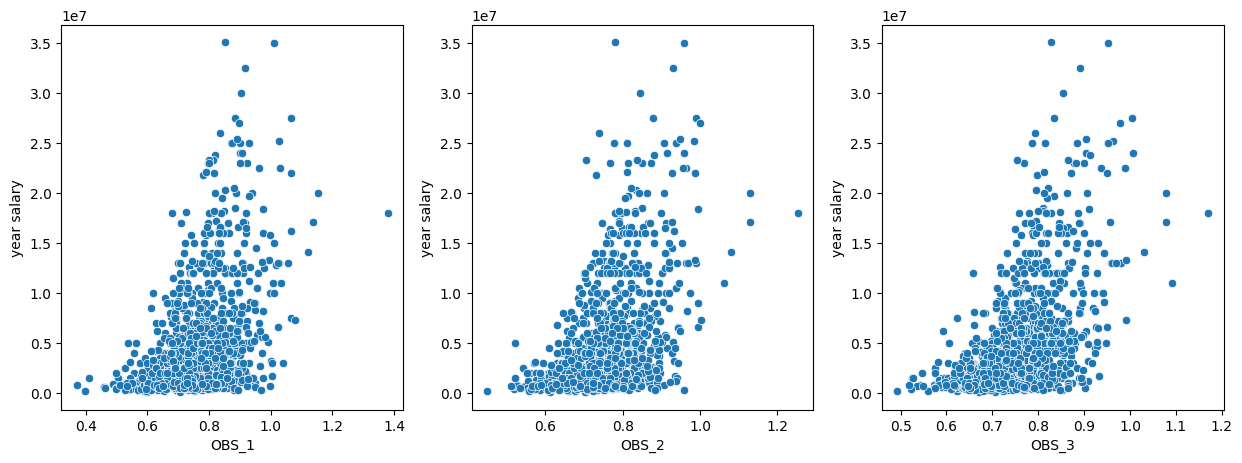

In [47]:
data_1 = pd.DataFrame(data= getPlotableData('OBS', 50, 1), columns = ['OBS_1', 'year salary']) 
data_2 = pd.DataFrame(data= getPlotableData('OBS', 50, 2), columns = ['OBS_2', 'year salary']) 
data_3 = pd.DataFrame(data= getPlotableData('OBS', 50, 3), columns = ['OBS_3', 'year salary']) 
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.scatterplot(data=data_1, x='OBS_1', y='year salary', ax=ax1)
sns.scatterplot(data=data_2, x='OBS_2', y='year salary', ax=ax2)
sns.scatterplot(data=data_3, x='OBS_3', y='year salary', ax=ax3)

For all three years, there is a general upward trend of salaries as OBS increases. 

From our EDA, we expect age, batting average, slugging, OBP, and OBS to affect salaries. In general, as batting stats get better (increase), the salaries increase. 

In order to make a predictive model, add previous year stats to the contracts dataframe so that all of the required information is in one dataframe.

In [48]:
# function that takes the type of stat and number of previous years of the stat as inputs, and outputs the average stat over those years
def get_stat(stat: str, years_back: int):
    data = []
    for index, contract in contracts.iterrows():
        if contract['playerName'] in list(batting['playerName']):
            average = 0
            for i in range(years_back):
                stats = getBattingStats(contract['playerName'], contract['year']-(i+1))
                if stats is not None:
                    average += float(stats[stat])
                else: 
                    average = np.NaN
                    break
            data.append(float(average/years_back))
    return data


Adding the average stat from 1,2, and 3 previous years for batting average, on-base percentage, slugging, and on-base plus slugging to the contracts dataframe.

In [49]:
stat_labels = ['AVG', 'OBP', 'SLG', 'OBS']
for stat in stat_labels:
    for year_back in [1,2,3]:
        contracts[stat + str(year_back)] = get_stat(stat, year_back)

contracts.head()


,playerName,playerAge,year,yearSalary,AVG1,AVG2,AVG3,OBP1,OBP2,OBP3,SLG1,SLG2,SLG3,OBS1,OBS2,OBS3
0,RobinsonCano,31.0,2014,24000000,0.314,0.3135,0.309667,0.383,0.381,0.370333,0.516,0.5330,0.533000,0.899,0.9140,0.903333
1,JacobyEllsbury,30.0,2014,21857143,0.298,0.2845,0.296667,0.355,0.334,0.348000,0.426,0.3980,0.449333,0.781,0.7315,0.797000
2,Shin-SooChoo,31.0,2014,18571429,0.285,0.2840,0.275667,0.423,0.398,0.380000,0.462,0.4515,0.431000,0.885,0.8500,0.811000
3,BrianMcCann,30.0,2014,17000000,0.256,0.2430,0.252000,0.336,0.318,0.329000,0.461,0.4300,0.442000,0.796,0.7470,0.770333
4,CurtisGranderson,33.0,2014,15000000,0.229,0.2305,0.241000,0.317,0.318,0.333333,0.407,0.4495,0.483667,0.723,0.7670,0.816667


Plot a heatmap to analyze which stats are positively and negatively correlated with yearSalary. 

<AxesSubplot: >

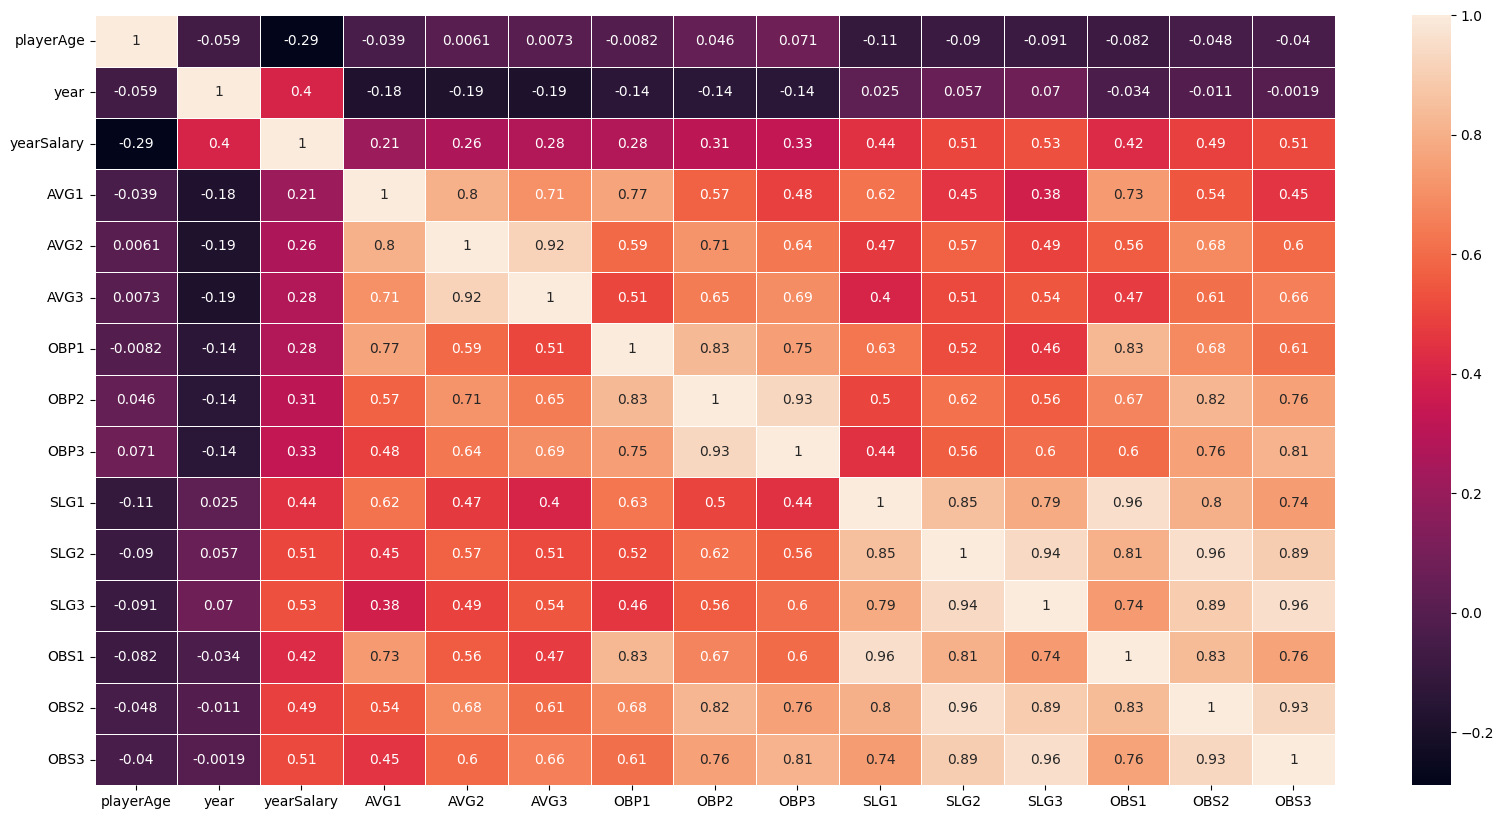

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(contracts.corr(),annot=True,linewidth=0.5)

From this plot we can see that out of all the batting statistics, SLG3 and OBS3 have the highest positive correlation with yearSalary (.53 and .51 respectively). We can also see that year is positively correlated with year salary (.4) and age is negatively correlate (-.29). 

Create a linear model to predict salaries based on player age, year, and OBS from 3 previous years (OBS 3).

In [51]:
outcome, predictors = patsy.dmatrices('yearSalary ~ playerAge + year + OBS3', contracts)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             yearSalary   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     417.1
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          1.68e-191
Time:                        21:06:44   Log-Likelihood:                -22332.
No. Observations:                1349   AIC:                         4.467e+04
Df Residuals:                    1345   BIC:                         4.469e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.674e+08   2.37e+07    -19.757      0.0

From the linear regression model, a player's age has a negative correlation with salaries while year and OBS3 has a positive correlation. 

**talk about p-value, r value, other important paramters**

Using the model parameters, we can create the linear model to predict salaries based on a player's age, the year, and the average OBS from the previous 3 years.

In [52]:
parameters = res.params
linear_model_salary = parameters[0] + parameters[1]*contracts['playerAge'] + parameters[2]*contracts['year'] + parameters[3]*contracts['OBS3']

**create a dataframe with examples of the linear model prediction; compare actual salary to predicted salary**

AUTOREGRESSIVE INTEGRATED MOVING AVERAGE

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*